In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls drive/My\ Drive/People_Detection/dadosImagem

Teste  Treinamento


In [0]:
!ln -s drive/My\ Drive/People_Detection/dadosImagem /content/Aula

In [0]:
!ls Aula/Treinamento/positivos

In [0]:
import cv2

In [0]:
img_caminho = 'Aula/Treinamento/positivos/crop_000010.png'
img_teste = cv2.imread(img_caminho)

In [0]:
cv2.imshow('img',img_teste)

DisabledFunctionError: ignored

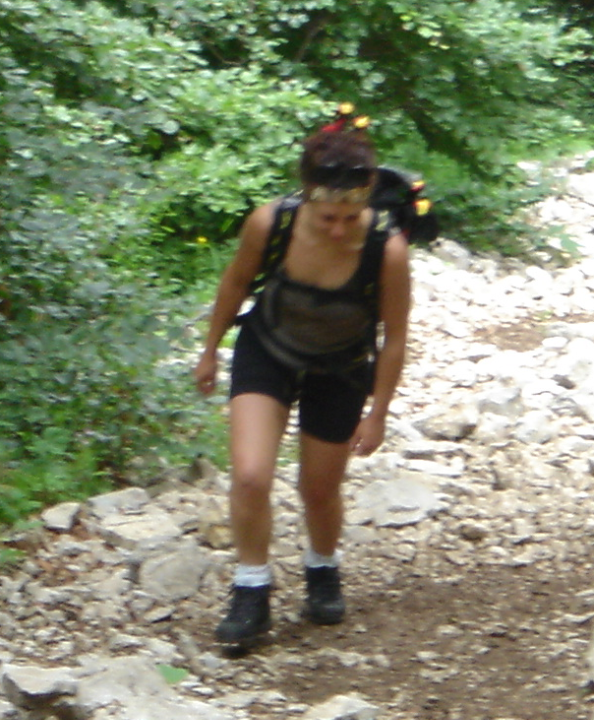

In [0]:
from google.colab.patches import cv2_imshow

cv2_imshow(img_teste)

In [0]:
print(type(img_teste)) #RGB - Red Green Blue
print(img_teste.shape)

<class 'numpy.ndarray'>
(720, 594, 3)


In [0]:
import numpy as np

In [0]:
print(img_teste)

[[[133 168 148]
  [139 175 153]
  [157 193 169]
  ...
  [ 22  36  32]
  [ 22  33  30]
  [ 24  34  28]]

 [[128 160 143]
  [144 179 159]
  [159 190 171]
  ...
  [ 23  31  30]
  [ 23  31  30]
  [ 21  33  27]]

 [[130 156 132]
  [152 181 156]
  [178 204 180]
  ...
  [ 20  33  31]
  [ 23  33  33]
  [ 24  34  34]]

 ...

 [[153 163 163]
  [150 160 160]
  [138 148 148]
  ...
  [126 144 161]
  [133 155 169]
  [137 164 171]]

 [[140 154 155]
  [135 149 150]
  [122 137 138]
  ...
  [129 149 163]
  [135 159 169]
  [141 169 176]]

 [[128 150 155]
  [119 141 146]
  [110 132 137]
  ...
  [132 161 166]
  [133 162 167]
  [152 179 183]]]


In [0]:
print("Minimo: ", np.min(img_teste))
print("Máximo: ", np.max(img_teste))

Minimo:  1
Máximo:  255


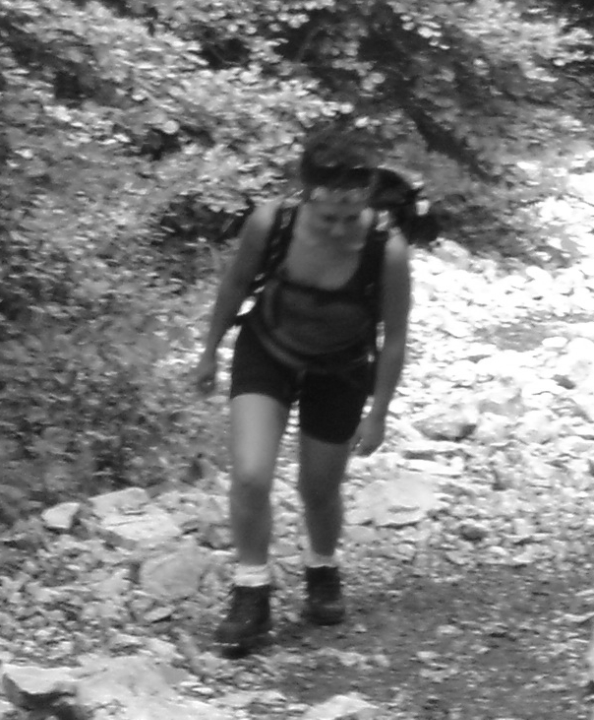

(720, 594)


In [0]:
img_teste_cinza = cv2.cvtColor(img_teste, cv2.COLOR_RGB2GRAY)
cv2_imshow(img_teste_cinza)
print(img_teste_cinza.shape)

In [0]:
from matplotlib import pyplot as plt

Original:  (720, 594)
Redimensionada (360, 360)


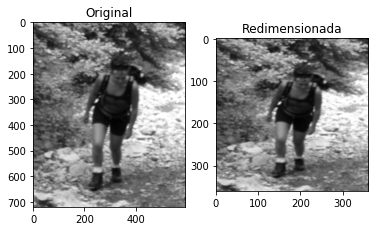

In [0]:
print('Original: ', img_teste_cinza.shape)
img_redimensionada = cv2.resize(img_teste_cinza, (360,360), interpolation=cv2.INTER_CUBIC)
print('Redimensionada', img_redimensionada.shape)

plt.subplot(121)
plt.title('Original')
plt.imshow(img_teste_cinza, cmap='gray', interpolation='bicubic')
plt.subplot(122)
plt.title('Redimensionada')
plt.imshow(img_redimensionada, cmap='gray', interpolation='bicubic')
plt.show()

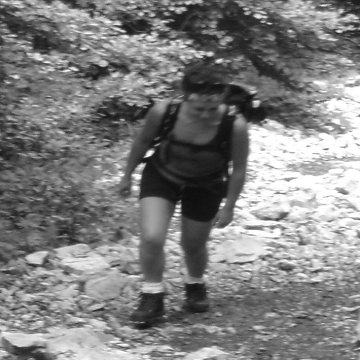

In [0]:
cv2_imshow(img_redimensionada)

In [0]:
histograma = cv2.calcHist([img_redimensionada], [0], None, [256], [0,256])
print(histograma.astype(np.int))

[[   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   6]
 [  41]
 [  81]
 [ 129]
 [ 167]
 [ 250]
 [ 311]
 [ 405]
 [ 392]
 [ 386]
 [ 377]
 [ 387]
 [ 366]
 [ 353]
 [ 317]
 [ 333]
 [ 357]
 [ 385]
 [ 377]
 [ 388]
 [ 451]
 [ 437]
 [ 393]
 [ 372]
 [ 408]
 [ 459]
 [ 429]
 [ 456]
 [ 443]
 [ 439]
 [ 438]
 [ 433]
 [ 418]
 [ 460]
 [ 478]
 [ 479]
 [ 460]
 [ 510]
 [ 519]
 [ 490]
 [ 489]
 [ 509]
 [ 500]
 [ 488]
 [ 534]
 [ 576]
 [ 589]
 [ 613]
 [ 609]
 [ 626]
 [ 606]
 [ 581]
 [ 589]
 [ 578]
 [ 623]
 [ 595]
 [ 641]
 [ 612]
 [ 631]
 [ 660]
 [ 636]
 [ 636]
 [ 604]
 [ 563]
 [ 669]
 [ 631]
 [ 611]
 [ 670]
 [ 639]
 [ 635]
 [ 666]
 [ 667]
 [ 707]
 [ 697]
 [ 719]
 [ 733]
 [ 707]
 [ 771]
 [ 723]
 [ 744]
 [ 761]
 [ 793]
 [ 791]
 [ 822]
 [ 827]
 [ 800]
 [ 844]
 [ 860]
 [ 925]
 [ 909]
 [ 867]
 [ 886]
 [ 950]
 [ 935]
 [ 912]
 [ 881]
 [ 912]
 [ 859]
 [ 868]
 [ 915]
 [ 902]
 [ 908]
 [ 897]
 [ 931]
 [ 934]
 [ 900]
 [ 926]
 [ 912]
 [ 878]
 [ 827]
 [ 847]
 [ 830]


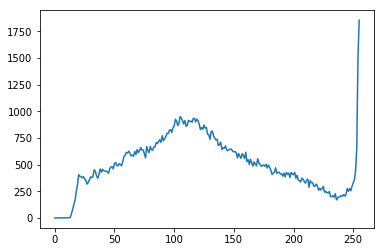

In [0]:
plt.plot(histograma)
plt.show()

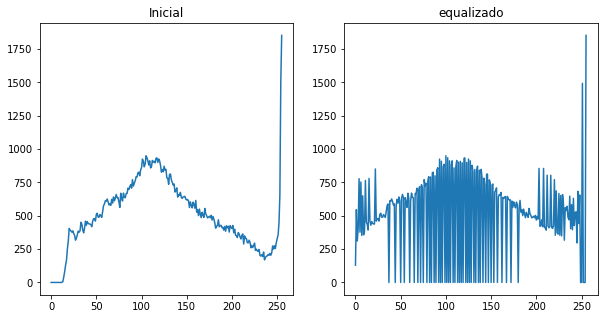

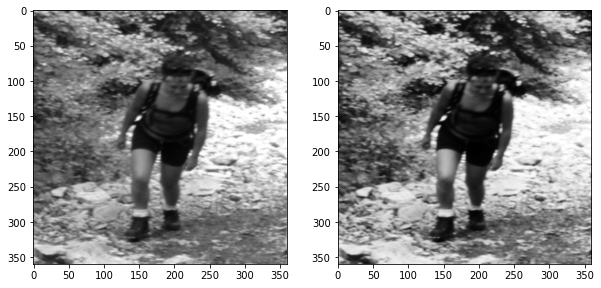

In [0]:
img_teste_equalizada = cv2.equalizeHist(img_redimensionada)
histograma_equalizado = cv2.calcHist([img_teste_equalizada], [0], None, [256], [0,256])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Inicial')
plt.plot(histograma)
plt.subplot(122)
plt.title('equalizado')
plt.plot(histograma_equalizado)

plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(img_redimensionada, cmap= 'gray', interpolation='bicubic')
plt.subplot(122)
plt.imshow(img_teste_equalizada, cmap= 'gray', interpolation='bicubic')
plt.show()

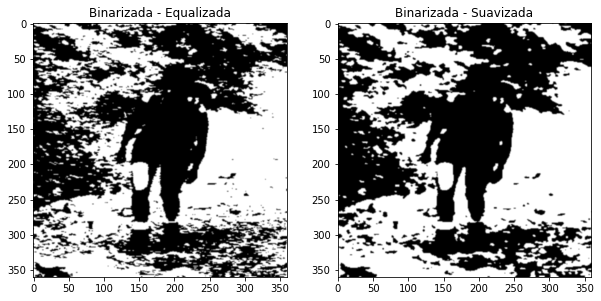

Limiar escolhido:  127.0 Limiar OTSU: 127.0


In [0]:
img_suavizada = cv2.GaussianBlur(img_teste_equalizada, (9,9), 1)

valor_retorno, img_binarizada = cv2.threshold(img_teste_equalizada, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
valor_retorno_otsu, img_binarizada_otsu = cv2.threshold(img_suavizada, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize = (10,10))
plt.subplot(121)
plt.title('Binarizada - Equalizada')
plt.imshow(img_binarizada, cmap = 'gray', interpolation='bicubic')

plt.subplot(122)
plt.title('Binarizada - Suavizada')
plt.imshow(img_binarizada_otsu, cmap = 'gray', interpolation='bicubic')

plt.show()

print("Limiar escolhido: ", valor_retorno, "Limiar OTSU:", valor_retorno_otsu)

- algura e largura: Sepala e petala

In [0]:
print(img_suavizada.size)

129600


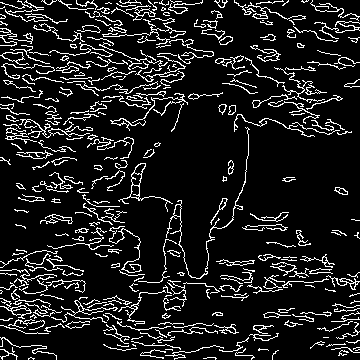

In [0]:
img_canny = cv2.Canny(img_suavizada, 100, 255)
cv2_imshow(img_canny)

In [0]:
def get_descritores(img_caminho):
    
    LARGURA = 360
    ALTURA = 360
    
    # Ler a imgem
    img_teste = cv2.imread(img_caminho, 0)
    
    #Redimensionar
    img_redimensionada = cv2.resize(img_teste, (LARGURA, ALTURA), interpolation=cv2.INTER_CUBIC)
    
    # Remover ruídos
    img_equalizada = cv2.equalizeHist(img_redimensionada)
    img_suavizada = cv2.GaussianBlur(img_equalizada, (9,9), 1)
    
    #Detectar pontos chaves
    orb = cv2.ORB_create(nfeatures=512)
    pontos_chave = orb.detect(img_suavizada, None)
    
    pontos_chave, descritores = orb.compute(img_suavizada, pontos_chave)
    
    return descritores

- ORB - Oriented FAST and Ratated BRIEF

- SURF - Speeded up robust features

- SIFT - Scale-invariant feature transform

In [0]:
descritor = get_descritores(img_caminho)

print("Tipo: ", type(descritor))
print("Formato descritor : ", descritor.shape)
print("\n descritor[0]: ", descritor[0])

Tipo:  <class 'numpy.ndarray'>
Formato descritor :  (512, 32)

 descritor[0]:  [100  51 121 101 112  15 107  24  34 236 123 237 215  71 203  16  30 141
 101 126 137 176 253  12 204 141  33 164 105 163  70 241]


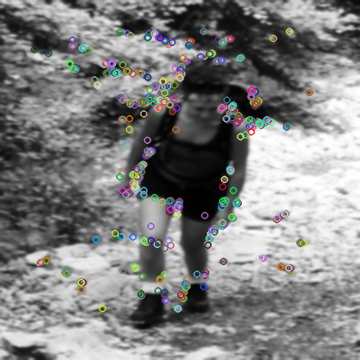

In [0]:
img_pontos = cv2.drawKeypoints(img_suavizada, pontos_chave, outImage = np.array([]), flags=0)
cv2_imshow(img_pontos)

In [0]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import os

In [0]:
QUANTIDADE_PALAVRAS_VIRTUAIS = 512

class PacoteDePalavras:
    
    def gerar_dicionario(self, lista_descritores):
        kmeans = KMeans(n_clusters = QUANTIDADE_PALAVRAS_VIRTUAIS)
        kmenas = kmeans.fit(lista_descritores)
        self.dicionario = kmeans.cluster_centers_
        
    def histograma_de_frequencia(self, descritor):

        try:
            algoritmo_knn = NearestNeighbors(n_neighbors = 1)
            algoritmo_knn.fit(self.dicionario)
            mais_proximos = algoritmo_knn.kneighbors(descritor, return_distance = False).flatten()

            histograma_caracteristica = np.histogram(mais_proximos, bins=np.arange(self.dicionario.shape[0]+1))[0]
        
            return histograma_caracteristica
        except AttributeError:
            print("O atributo dicionario nao foi definido")
            
    def salvar_dicionario(self, caminho='', nome_dicionario = 'dicionario.csv'):
        try:
            np.savetxt(os.path.join(caminho, nome_dicionario), self.dicionario, delimiter=',', fmt='%f')
            print("Dicionario salvo")
            
        except AttributeError:
            print("Dicionario Vazio")
        
    def carregar_dicionario(self, caminho='', nome_dicionario = 'dicionario.csv'):
        
        self.dicionario = np.loadtxt(os.path.join(caminho,nome_dicionario), delimiter=',')

In [0]:
teste_palavras_virtuais = PacoteDePalavras()
teste_palavras_virtuais.gerar_dicionario(descritor)
histograma_caracteristica = teste_palavras_virtuais.histograma_de_frequencia(descritor)
print(histograma_caracteristica)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [0]:
DICIONARIO_NOME = 'dicionario.csv'
dados_treinamento = ['Aula/Treinamento/positivos/', 'Aula/Treinamento/negativos']

# Rotina para criação do dicionario de palavras virtuais

descritores = np.empty((0,32), dtype=np.uint8)

for caminho in dados_treinamento:

    for raiz,diretorios,arquivos in os.walk(caminho):
    
        for arquivo in arquivos:
            if arquivo.endswith('.png'):
                orb_descritor = get_descritores(os.path.join(caminho,arquivo))
                descritores = np.append(descritores, orb_descritor, axis=0)
                
img_representacao = PacoteDePalavras()
img_representacao.gerar_dicionario(descritores)
img_representacao.salvar_dicionario('Aula/', DICIONARIO_NOME)

In [0]:
def salvar_descritor(descritor, caminho, nome_arquivo):
    descritor = descritor.reshape((1,descritor.size))
    arquivo = open(os.path.join(caminho, nome_arquivo), 'a')
    np.savetxt(arquivo, descritor, delimiter=',', fmt='%i')
    arquivo.close()

In [0]:
# computar descritores gerando histograma de cada imagem separadamente

NOME_DESCRITOR = 'orb_descritor.csv'

for caminho in dados_treinamento:
    
    for raiz, diretorios, arquivos in os.walk(caminho):
        
        for arquivo in arquivos:
            if arquivo.endswith('.png'):
                descritor = get_descritores(os.path.join(caminho, arquivo))
                histograma_descritor = img_representacao.histograma_de_frequencia(descritor)
                salvar_descritor(histograma_descritor, caminho, NOME_DESCRITOR)
                
print("estração de caracteriscas finalizada e descritores salvos!")

estraçãode caracteriscas finalizada e descritores salvos!


In [0]:
def carregar_descritores(caminho, nome_arquivo='orb_descritor.csv'):
    descritores = np.loadtxt(os.path.join(caminho, nome_arquivo), delimiter=',')
    print('formato do array de descritores: ', descritores.shape)
    return descritores

In [0]:
# Carregar descritores salvos

descritores = np.empty((0,QUANTIDADE_PALAVRAS_VIRTUAIS))
for caminho in dados_treinamento:
    descritores = np.append(descritores, carregar_descritores(caminho, NOME_DESCRITOR), axis=0)

formato do array de descritores:  (400, 512)
formato do array de descritores:  (400, 512)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# KNN para classificar as imagens

QUANTIDADE_DE_DADOS_TREINAMENTO = 400
QUANTIDADE_DE_DADOS_TESTE = 100

rotulos_treinamento = np.ones(QUANTIDADE_DE_DADOS_TREINAMENTO, dtype=np.uint8)
rotulos_treinamento = np.append(rotulos_treinamento,np.zeros(QUANTIDADE_DE_DADOS_TREINAMENTO, dtype=np.uint8))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(descritores,rotulos_treinamento)

dados_teste = ['Aula/Teste/positivos/', 'Aula/Teste/negativos/']


img_teste_descritores = np.empty((0,QUANTIDADE_PALAVRAS_VIRTUAIS), dtype=np.uint8)

for caminho in dados_teste:
    for raiz,diretorios, arquivos in os.walk(caminho):
        for arquivo in arquivos:
            if arquivo.endswith('.png'):
                img_descritor = get_descritores(os.path.join(caminho,arquivo))
                img_descritor = img_representacao.histograma_de_frequencia(img_descritor)
                img_dim_expandida = np.expand_dims(img_descritor, axis=0)
                img_teste_descritores = np.append(img_teste_descritores, img_dim_expandida, axis=0)
                

rotulos_teste = np.concatenate((np.ones(QUANTIDADE_DE_DADOS_TESTE, dtype=np.uint8), np.zeros(QUANTIDADE_DE_DADOS_TESTE, dtype=np.uint8)))
print('Acurácia: ',knn.score(img_teste_descritores, rotulos_teste))

Acurácia:  0.655


In [0]:
from sklearn.metrics import confusion_matrix

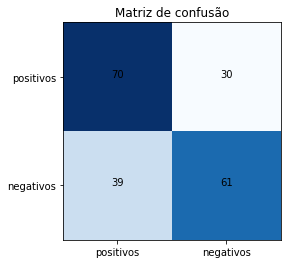

In [0]:
rotulos_previstos = knn.predict(img_teste_descritores)
matriz = confusion_matrix(rotulos_teste, rotulos_previstos)

plt.imshow(matriz, cmap=plt.cm.Blues, interpolation='nearest')
plt.title("Matriz de confusão")

labels = ['positivos', 'negativos']

marcador_escalas = range(len(labels))

plt.yticks(marcador_escalas, labels)
plt.xticks(marcador_escalas, labels)

for linha in range(matriz.shape[0]):
    for coluna in range(matriz.shape[1]):
        plt.text(coluna, linha, format(matriz[linha,coluna]), horizontalalignment='center', color='black')
plt.show()

In [0]:
!pip install yellowbrick

DADOS TREINAMENTO


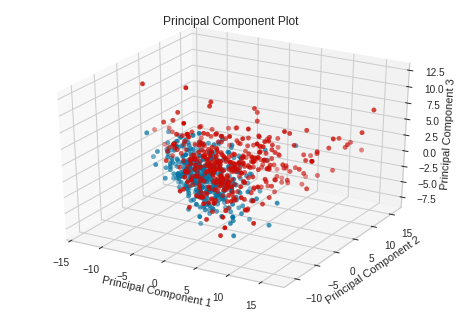

DADOS TESTE


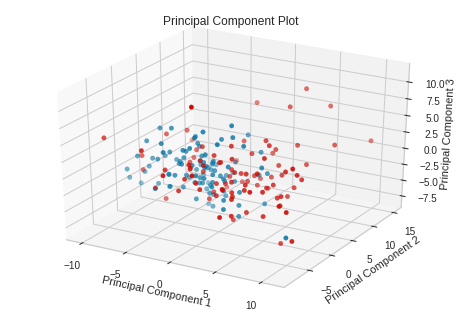

In [0]:
from yellowbrick.features.pca import PCADecomposition

print("DADOS TREINAMENTO")
cores_treinamento = np.array(['r' if label==0 else 'b' for label in rotulos_treinamento])
visualizador_treinamento = PCADecomposition(scale=True, color= cores_treinamento, proj_dim=3)
visualizador_treinamento.fit_transform(descritores, rotulos_treinamento)
visualizador_treinamento.poof()

print("DADOS TESTE")

cores_teste = np.array(['r' if label == 0 else 'b' for label in rotulos_teste])
visualizador_teste = PCADecomposition(scale=True, color=cores_teste, proj_dim=3)
visualizador_teste.fit_transform(img_teste_descritores, rotulos_teste)
visualizador_teste.poof()